In [26]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import practicalSPARQL

In [27]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [28]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [29]:
# Keyword to search for
keyword_to_search = 'CK_Right and Oblique Sphere'

# Filter rows where 'keywords' contains the keyword
filtered_df = df[df['cks'].str.contains(fr'\b{keyword_to_search}\b', case=False, na=False)]

#mergeing all the df
right_oblique_spheres = filtered_df[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
right_oblique_spheres.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

C:\Users\nogas\AppData\Local\Temp\ipykernel_21380\1205601301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_oblique_spheres.rename(columns={'custom_identifier': 'part_id'}, inplace=True)


In [30]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

------ Endpoint not found - Sleeping for 5 seconds and retrying ------


In [31]:
# Step 1: Get the unique values of 'cluster_name'
#unique_cluster_names = right_oblique_spheres['cluster_name'].unique()
# Step 2: Convert the unique values into a DataFrame
#unique_cluster_names_df = pd.DataFrame(unique_cluster_names, columns=['unique_cluster_name'])
#unique_cluster_names_df.to_excel('right_and_oblique_spheres.xlsx', sheet_name='Sheet1', index=False)

In [32]:
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\right_and_oblique_spheres.xlsx'
visual_data = pd.read_excel(path_to_xlsx)
visual_data.rename(columns={'unique_cluster_name': 'cluster_name'}, inplace=True)

In [33]:
right_oblique_spheres_full = pd.merge(right_oblique_spheres, visual_data, on='cluster_name')
right_oblique_spheres_full

,images,cluster_name,cks,bid,part_id,year,place,3D,Multiple horizons,human figure,color,circle,double image,Column1,Column2,Column3
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01593,CK_Right and Oblique Sphere,1924,322,1488,Venice,no,no,no,no,full circle,yes,NaN,NaN,NaN
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01158,"CK_Horizon, CK_Right and Oblique Sphere",1924,322,1488,Venice,no,yes,no,no,full circle,no,NaN,NaN,NaN
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00014,CK_Right and Oblique Sphere,2200,100,1489,Leipzig,no,no,no,no,semi-circle,yes,NaN,NaN,NaN
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02193,CK_Right and Oblique Sphere,2200,100,1489,Leipzig,yes,no,no,no,semi-circle,yes,NaN,NaN,NaN
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01971,"CK_Horizon, CK_Right and Oblique Sphere, CK_Su...",1938,100,1472,Ferrara,no,no,no,no,full circle,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00699,"CK_Horizon, CK_Right and Oblique Sphere",2253,688,1555,Paris,yes,no,no,no,full circle,no,NaN,NaN,NaN
663,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01971,"CK_Horizon, CK_Right and Oblique Sphere, CK_Su...",2236,812,1561,Antwerp,no,no,no,no,full circle,no,NaN,NaN,NaN
664,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02026,CK_Right and Oblique Sphere,2236,812,1561,Antwerp,no,no,no,yes,full circle,yes,NaN,NaN,NaN
665,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01733,"CK_Right and Oblique Sphere, CK_Armillary Sphere",2280,257,1556,Seville,yes,no,no,yes,full circle,no,NaN,NaN,material repreaentation globe


C:\Users\nogas\AppData\Local\Temp\ipykernel_21380\1977179575.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21380\1977179575.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_books_df = books.groupby('interval')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_21380\1977179575.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

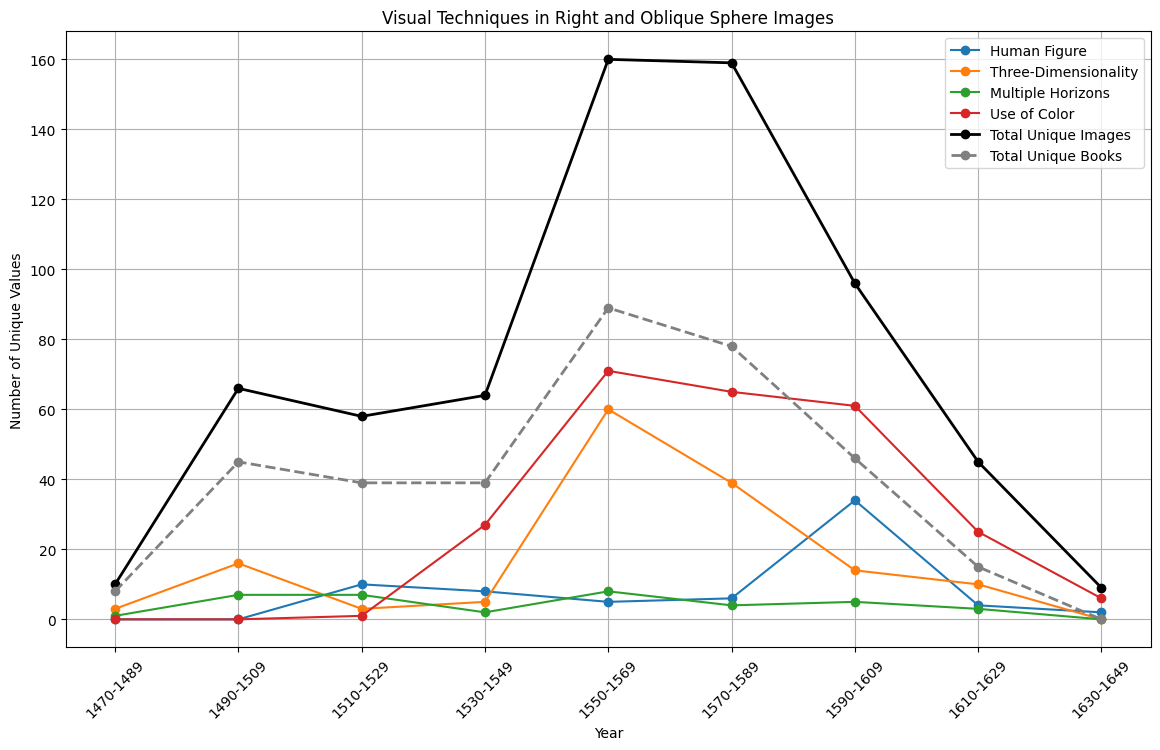

In [35]:
# Ensure the 'year' column is of type int
right_oblique_spheres_full['year'] = right_oblique_spheres_full['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
right_oblique_spheres_full['interval'] = pd.cut(right_oblique_spheres_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(right_oblique_spheres_full['year'], bins=bins, labels=labels, right=False)

# Filter and group data for each category
def count_unique_images_by_column(column_name, value):
    filtered_df = right_oblique_spheres_full[right_oblique_spheres_full[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique()

# Collect data
human_figures = count_unique_images_by_column('human figure', 'yes')
three_dimensionality_effect = count_unique_images_by_column('3D', 'yes')
multiple_horizons = count_unique_images_by_column('Multiple horizons', 'yes')
color_blocks = count_unique_images_by_column('color', 'yes')

# Combine the data for line plots
side_by_side_data = pd.DataFrame({
    'Human Figure': human_figures,
    'Three-Dimensionality': three_dimensionality_effect,
    'Multiple Horizons': multiple_horizons,
    'Use of Color': color_blocks
})

# Ensure 'books' DataFrame is defined and has the correct columns
# For demonstration, let's assume it has the same structure as `sphericity_earth_full`
# If 'books' is a different DataFrame, adjust accordingly.
total_unique_books_df = books.groupby('interval')['book'].nunique()

# Calculate total number of unique images in 'sphericity_earth_full' for each interval
total_unique_images = right_oblique_spheres_full.groupby('interval')['images'].nunique()

# Plot lines for each category
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(side_by_side_data.index, side_by_side_data[column], marker='o', label=column)

# Plot the lines for total unique images and total unique books
ax.plot(total_unique_images.index, total_unique_images.values, marker='o', linestyle='-', color='black', label='Total Unique Images', linewidth=2)
ax.plot(total_unique_books_df.index, total_unique_books_df.values, marker='o', linestyle='--', color='gray', label='Total Unique Books', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Right and Oblique Sphere Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
